Libraries

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import os
from torch import nn
from torch.utils.data import DataLoader
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

Creating the datasets

First function 

In [44]:
%%latex
\(f_1(x):=xx-yy\)

<IPython.core.display.Latex object>

In [45]:
def f1(x, y):
    return x*x-y*y

x and y lists

In [46]:
x=np.linspace(-10**(2), 10**(2), 10**(4))
y=np.linspace(-10**(2), 10**(2), 10**(4))

plot of f1

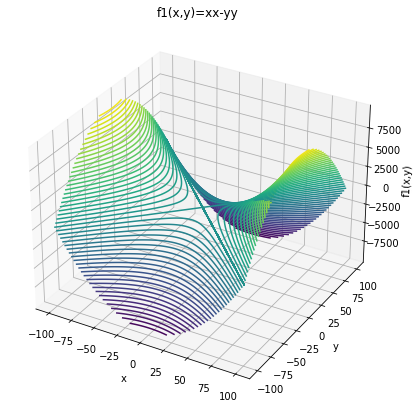

In [47]:
X, Y = np.meshgrid(x, y)
Z = f1(X, Y)
fig = plt.figure(figsize =[10,7])
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f1(x,y)')
ax.set_title('f1(x,y)=xx-yy')
plt.savefig('figures/f1_plot')
plt.show()

Creating a DataFrame

Random shuffling x and y in order to have non-zero values for f1(x,y)

In [48]:
x1=x.copy()
y1=y.copy()
np.random.shuffle(x1)
np.random.shuffle(y1.copy())


x1 and y1 visualisation 

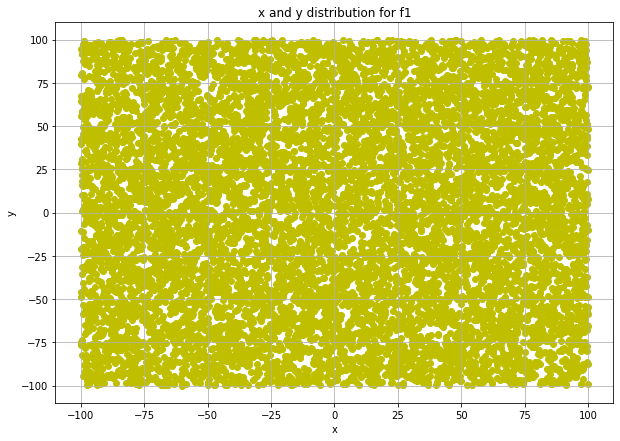

In [49]:
plt.figure(figsize=[10,7])
plt.title('x and y distribution for f1')
plt.scatter(x1,y1, color='y')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.savefig('figures/shuffled_x_y_f1')
plt.show()



Saving the data to a pandas dataFrame format

In [50]:
data_array_f1={'x':x1, 'y':y1, 'f1(x,y)': f1(x1,y1)}
data_frame_f1=pd.DataFrame(data_array_f1, columns=['x', 'y', 'f1(x,y)'])
data_frame_f1.to_csv('datasets/f1_dataset.csv')

Now that we have a dataset ready to be explored, we implement our Neural Network

Try f1 approximation using 1 layer with 2 neurons 

In [53]:
# defining NN architecture
class NN1(nn.Module):
    def __init__(self, input_features, h1):
        super().__init__()
        self.layer1=nn.Linear(input_features, 2)
        self.output=nn.Linear(2,1)
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x=self.output(x)
        return x

Creating our Model

In [54]:
torch.manual_seed(123)
model_1_f1=NN1(2, h1=3)

Importing our data

In [55]:
Data_f1=pd.read_csv('./datasets/f1_dataset.csv')

In [56]:
Data_f1.head()

,Unnamed: 0,x,y,"f1(x,y)"
0,0,-60.116012,-100.000000,-6386.065149
1,1,-36.913691,-99.979998,-8633.379390
2,2,26.892689,-99.959996,-9268.784064
3,3,45.334533,-99.939994,-7932.782477
4,4,9.670967,-99.919992,-9890.477197


Loading the data

In [57]:
Input_data=Data_f1[['x','y']].to_numpy()
f1_data=Data_f1['f1(x,y)'].to_numpy()

Input_train and Input_test represent the variables (x, y), respectively for training and testing. While f1_train and f1_test are the labels for respectively the training and testing.

In [58]:
Input_train, Input_test,f1_train ,f1_test = train_test_split(Input_data, f1_data , test_size=0.33, random_state=42)

Transform our feautures an labels into Tensors 

In [59]:
Input_train=torch.Tensor(Input_train)
f1_train=torch.Tensor(f1_train)
Input_test=torch.Tensor(Input_test)
f1_test=torch.Tensor(f1_test)

Our criterion is the loss function. And the optimizer is the decent methode

In [60]:
criterion= nn.MSELoss()
optimizer=torch.optim.Adam(model_1_f1.parameters(), lr=0.01)

In [ ]:
from tqdm import tqdm

In [69]:
# train
epochs = 5
loss_array=[]
for e in range(epochs):
    running_loss = 0
    # batch training
    

    # forward pass
    output = model_1_f1(Input_train)

    # compute the loss
    loss = criterion(output, f1_train)


    optimizer.zero_grad() # clear previous gradients
    loss.backward() # backward pass
    optimizer.step()

    loss_array+=[loss.item()]


/Users/cheikhmalainine/Desktop/zama_challenge/zama/lib/python3.7/site-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([6700])) that is different to the input size (torch.Size([6700, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


ValueError: x and y must have same first dimension, but have shapes (33500,) and (5,)

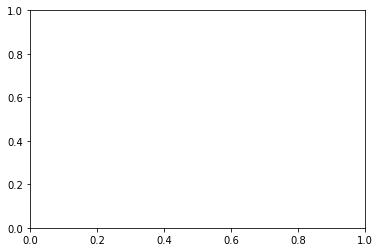

In [70]:
plt.plot(range(epochs*len(Input_train)),loss_array)